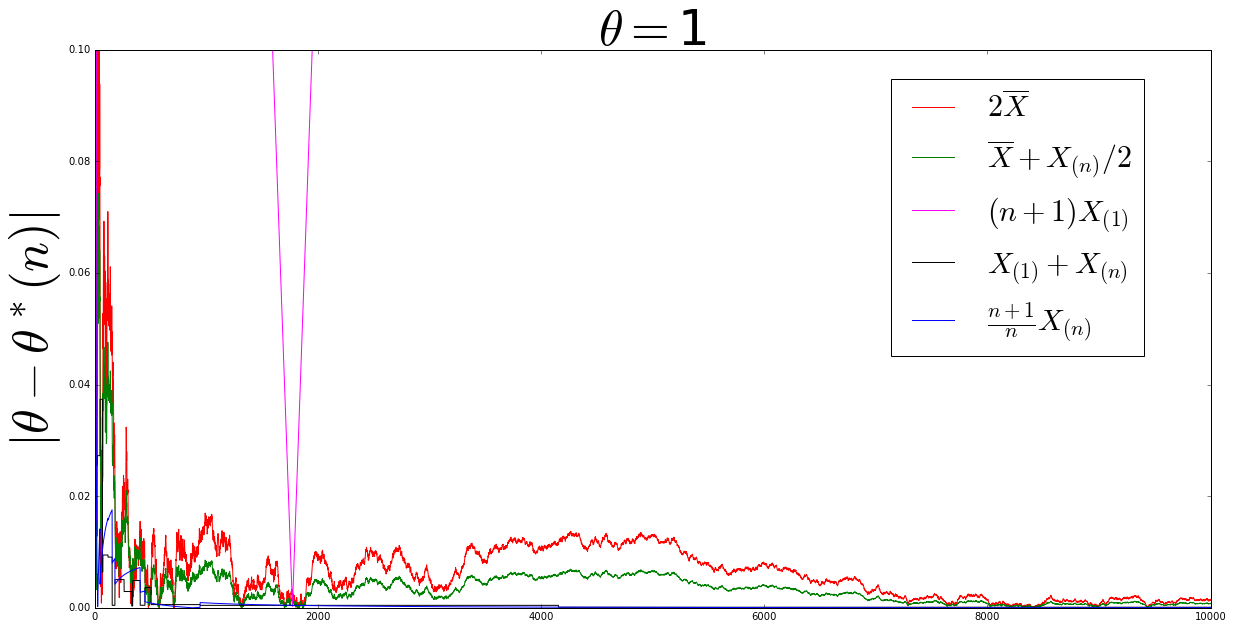

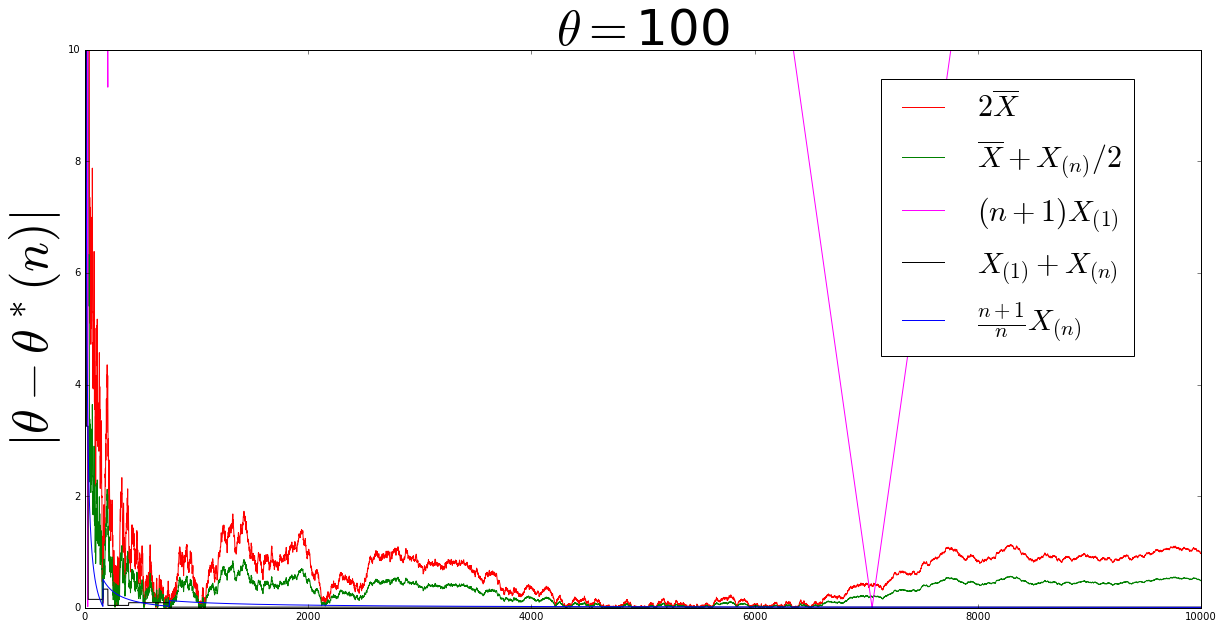

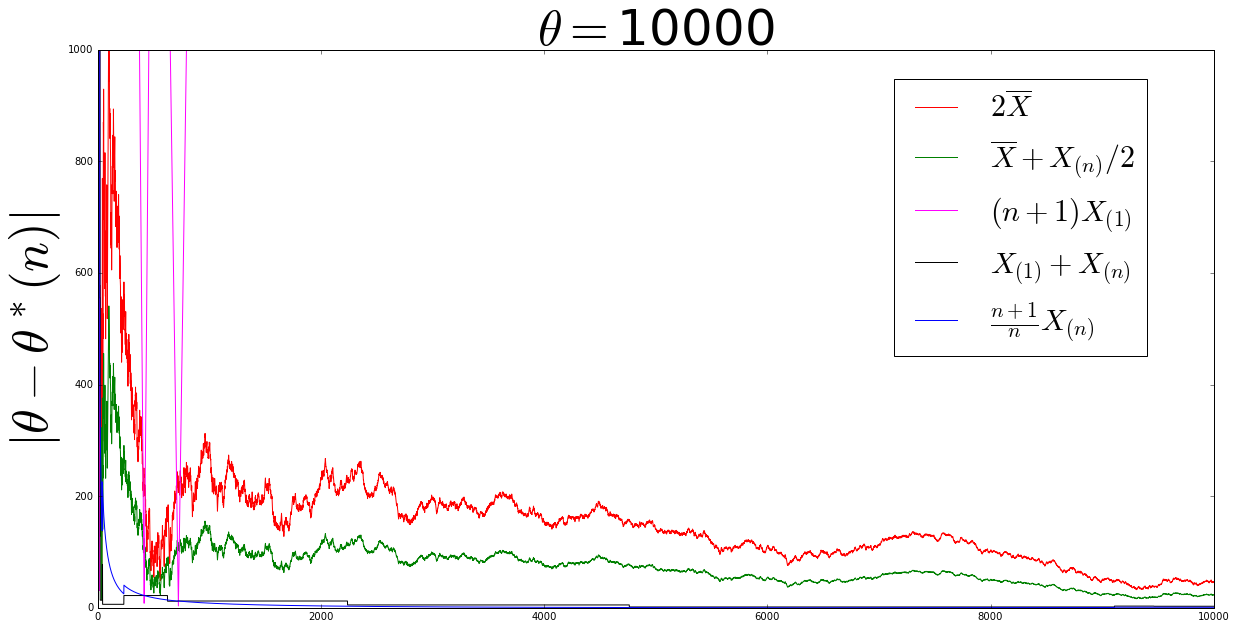

In [2]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sample_size = 10000

#считаем оценки для праметра
def calculation(parameter):
   
    #генерируем выборку из равномерного распределения на отрезке с концами [0, parameter] 
    sample = sps.uniform.rvs( size = sample_size, loc = 0, scale = parameter)
   
    #выборочное среднее
    sample_mean = []

    #разница между истинным значением параметра и удвоенным выборочным средним 
    double_sample_mean = []
    
    #... (выборочным средним и половиной максимума)
    sample_mean_vs_max = []
    
    #... (n + 1)X(min)
    n_min = []
    
    #... X(min) + X(max)
    min_max = []
    
    #... (n + 1) * X(max) / (n)
    n_max = []

    sum = 0
    buf_sample = []
    buf_min = sample[0]
    buf_max = sample[0]
    for i in range(0, sample_size):
        
        buf_min = min(buf_min, sample[i])
        buf_max = max(buf_max, sample[i])
        
        sum += sample[i]
        sample_mean.append(sum / (i + 1))
        
        double_sample_mean.append( abs(sample_mean[i] * 2 - parameter) )
        sample_mean_vs_max.append( abs(sample_mean[i] + buf_max / 2 - parameter) )
        n_min.append( abs((i + 2) * buf_min - parameter) )
        min_max.append( abs(buf_max + buf_min - parameter) )
        n_max.append( abs((i + 2) * buf_max / (i + 1) - parameter) )

    result = []
    
    result.append( double_sample_mean )
    result.append( sample_mean_vs_max )
    result.append( n_min )
    result.append( min_max )
    result.append( n_max )
    
    return result

parameter = 1
res = []

for i in range(3):
    
    #расчитываем разницу между оценками и истинным значением
    res.append(calculation(parameter))
    
    #рисуем графики разностей
    plt.figure(figsize=(20,10))
    
    plt.title(r'$\theta=$' + str(parameter), fontsize = 50)
    plt.plot(np.arange(1, sample_size + 1), res[i][0], color = 'red', label='$2\overline{X}$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][1], color = 'green', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][2], color = 'magenta', label='$(n+1)X_{(1)}$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][3], color = 'black', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][4], color = 'blue', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylabel('$|\\theta - \\theta^*(n)|$', fontsize = 50)
    plt.ylim(0, parameter / 10)
    plt.show()
   
    parameter *= 100

### Оценка $(n+1)X_{(1)}$ не является даже несмещённой, поэтому она даёт такие большей отклонения от истинного значения, нарисуем графики отклонения без этой оценки

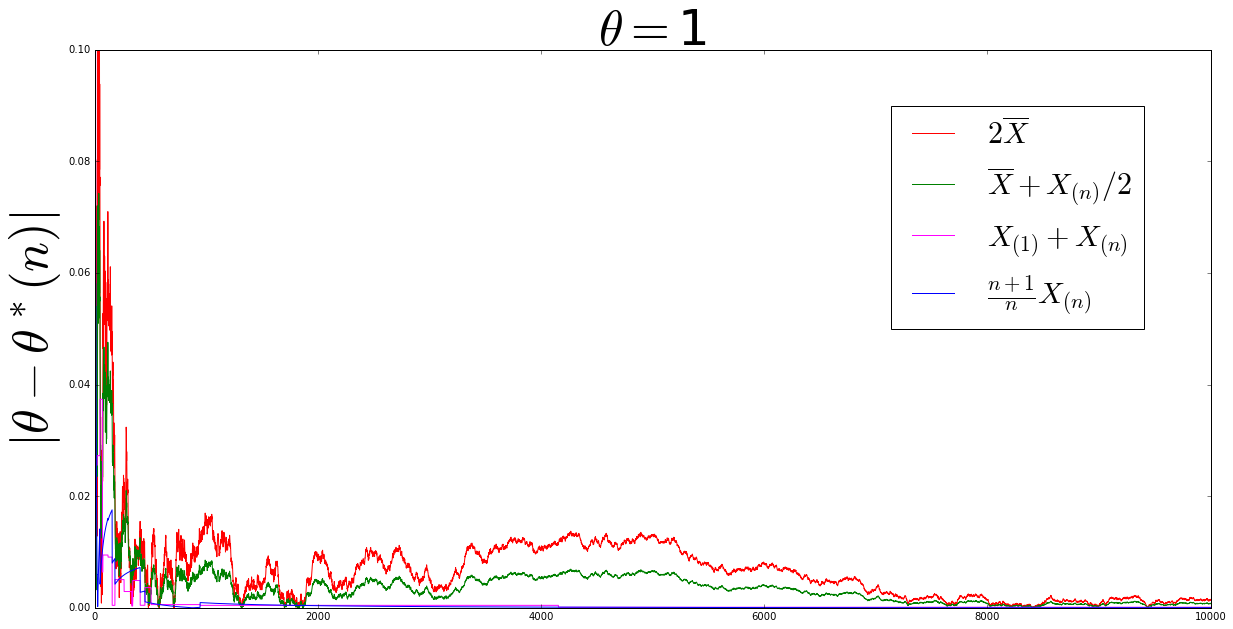

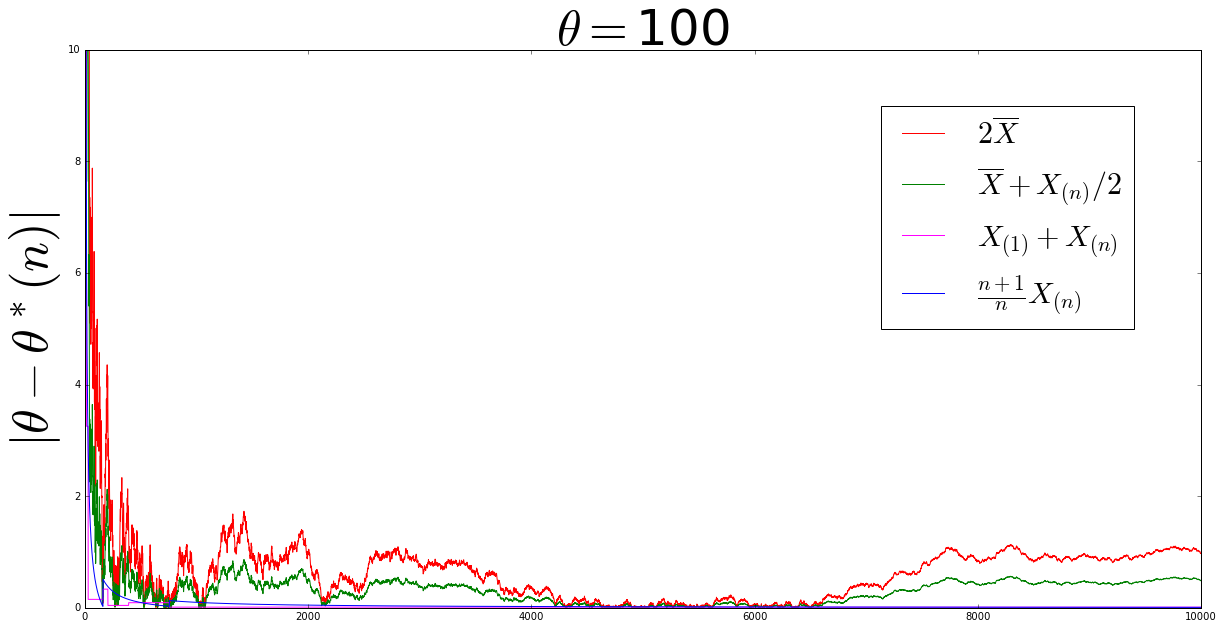

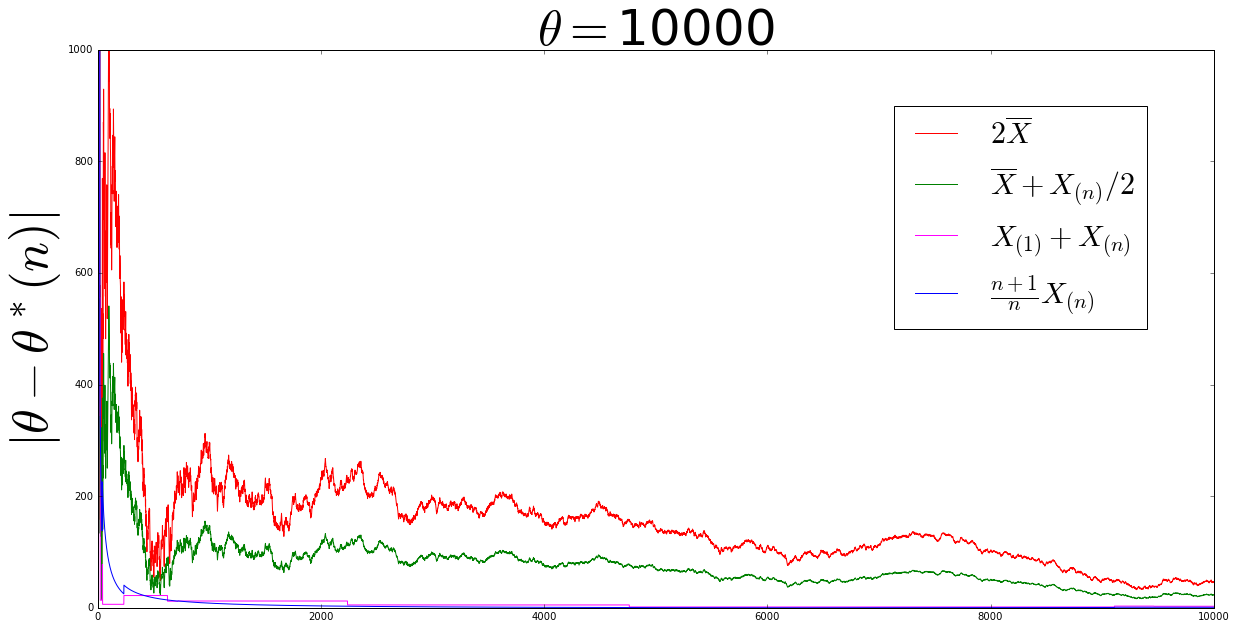

In [3]:
parameter = 1
for i in range(3):

    res.append(calculation(parameter))

    plt.figure(figsize=(20,10))
    plt.title(r'$\theta=$' + str(parameter), fontsize = 50)
    plt.plot(np.arange(1, sample_size + 1), res[i][0], color = 'red', label='$2\overline{X}$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][1], color = 'green', label='$\overline{X} + X_{(n)}/2$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][3], color = 'magenta', label='$X_{(1)}+X_{(n)}$')
    plt.plot(np.arange(1, sample_size + 1),  res[i][4], color = 'blue', label=r'$\frac{n+1}{n} X_{(n)}$')
    plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.7), fontsize = 30)
    plt.ylabel('$|\\theta - \\theta^*(n)|$', fontsize = 50)
    plt.ylim(0, parameter / 10)
    plt.show()
   
    parameter *= 100